In [2]:
import pandas as pd
import kagglehub
import matplotlib.pyplot as plt

plt.style.use("dark_background")

In [3]:


# Download latest version
path = kagglehub.dataset_download("rohitsahoo/sales-forecasting")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\luiz.silva\.cache\kagglehub\datasets\rohitsahoo\sales-forecasting\versions\2


In [4]:
dados_brutos = pd.read_csv('train.csv',sep=',',encoding="UTF-8")

dados_brutos

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [5]:
dados_limpos = dados_brutos.drop(columns={'Row ID',
                                          'Order ID',
                                          'Customer ID',
                                          'Customer Name',
                                          'Postal Code',
                                          'Product ID',
                                          'Order Date',
                                          'Ship Date'})

dados_limpos

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Product Name,Sales
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...
9795,Standard Class,Corporate,United States,Chicago,Illinois,Central,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,Standard Class,Corporate,United States,Toledo,Ohio,East,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,Standard Class,Corporate,United States,Toledo,Ohio,East,Technology,Phones,GE 30524EE4,235.1880
9798,Standard Class,Corporate,United States,Toledo,Ohio,East,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [6]:
dados_limpos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9800 non-null   object 
 1   Segment       9800 non-null   object 
 2   Country       9800 non-null   object 
 3   City          9800 non-null   object 
 4   State         9800 non-null   object 
 5   Region        9800 non-null   object 
 6   Category      9800 non-null   object 
 7   Sub-Category  9800 non-null   object 
 8   Product Name  9800 non-null   object 
 9   Sales         9800 non-null   float64
dtypes: float64(1), object(9)
memory usage: 765.8+ KB


Top 5 Regiões que mais venderam

,Region,Sales
3,West,710219.6845
1,East,669518.7260
0,Central,492646.9132
2,South,389151.4590


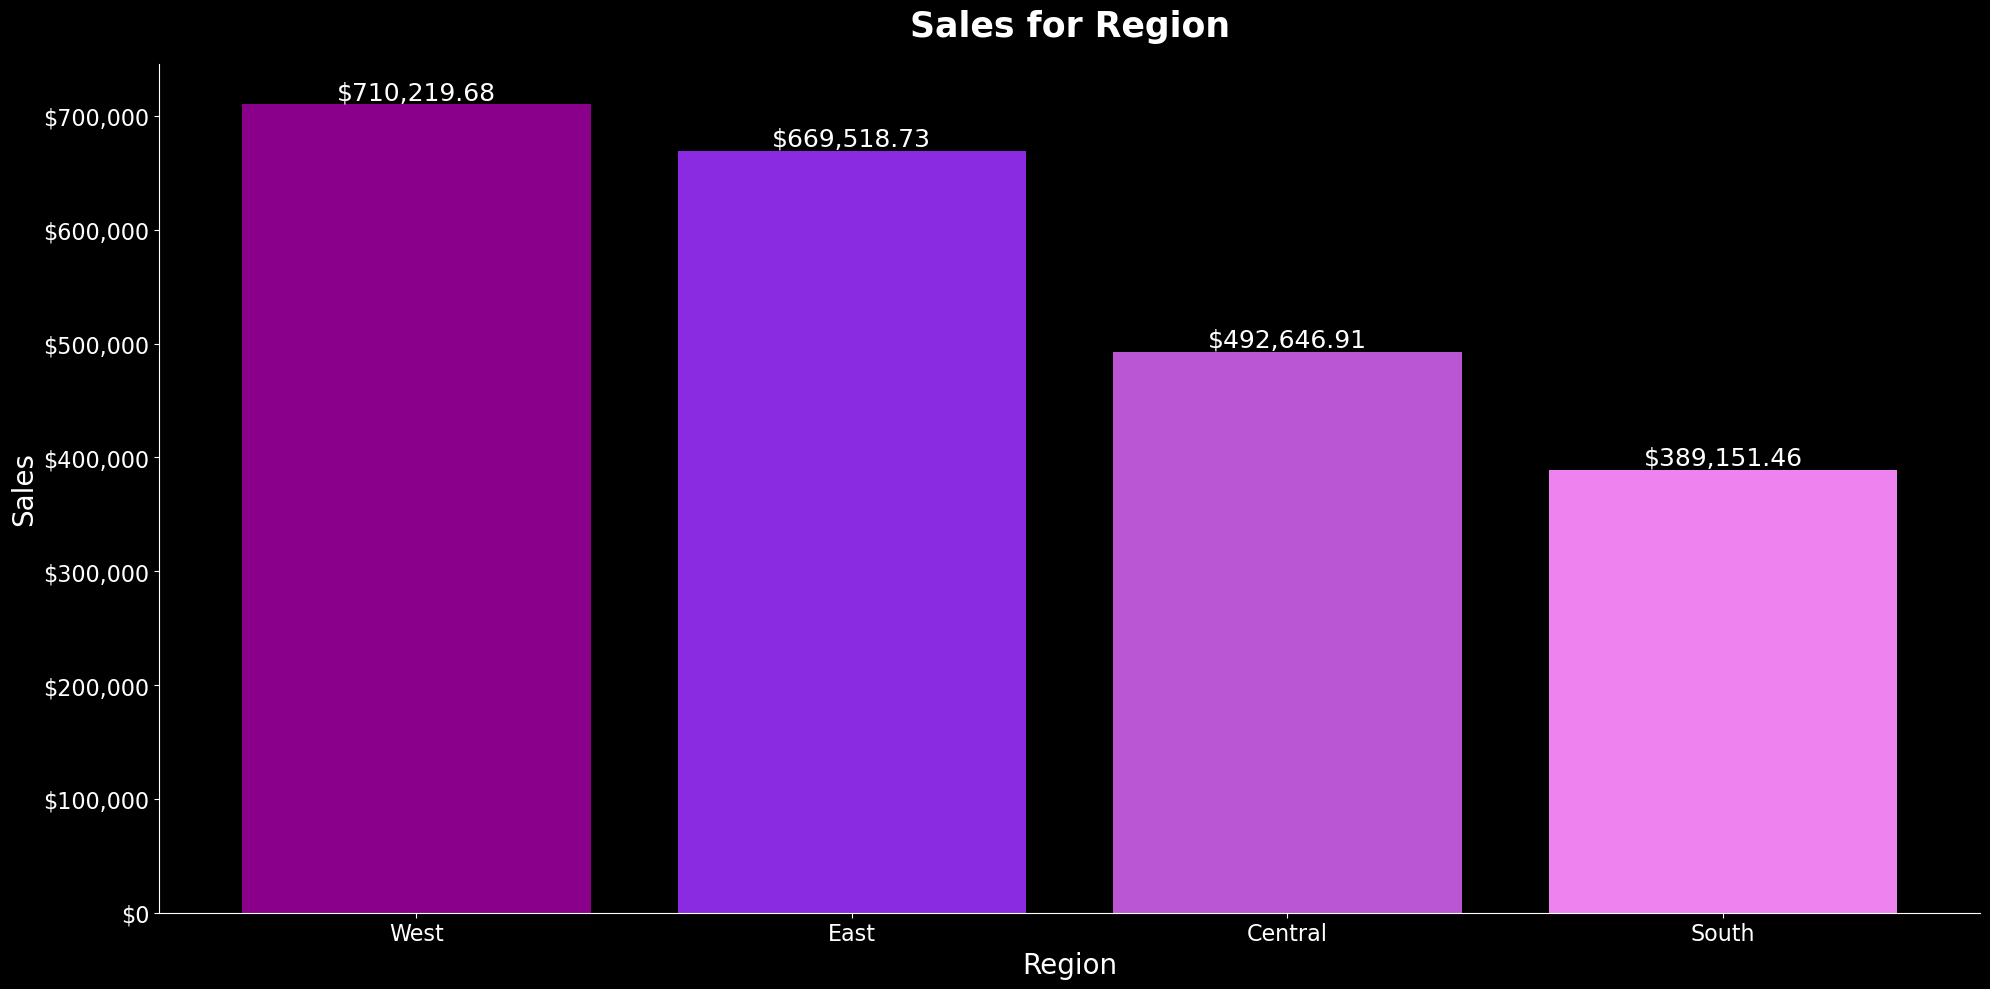

In [ ]:
regiao_mais_vendeu = dados_limpos.groupby('Region')['Sales'].sum()

df_regioes = pd.DataFrame({
    'Region': regiao_mais_vendeu.index,
    'Sales' : regiao_mais_vendeu.values
})

df_regioes = df_regioes.sort_values('Sales',ascending=False).head()

display(df_regioes)

plt.figure(figsize=[20,10])
bars = plt.bar(df_regioes['Region'],df_regioes['Sales'],color=['darkmagenta','blueviolet','mediumorchid','violet','plum'])

for bar in bars:
    altura = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.,altura,
             f'${altura:,.2f}',
             ha='center',va='bottom',fontsize=18)
    
plt.title('Sales for Region',fontsize=25,fontweight='bold',pad=20)
plt.xlabel('Region',fontsize=20)
plt.ylabel('Sales',fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Removendo a borda direita e superior
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# Formatando eixo Y para mostrar valores monetários
plt.gca().yaxis.set_major_formatter('${x:,.0f}')

plt.tight_layout()  
plt.show()


Top 5 cidades que mais venderam.

,Citys,Sales
327,New York City,252462.547
265,Los Angeles,173420.181
450,Seattle,116106.322
436,San Francisco,109041.120
372,Philadelphia,108841.749


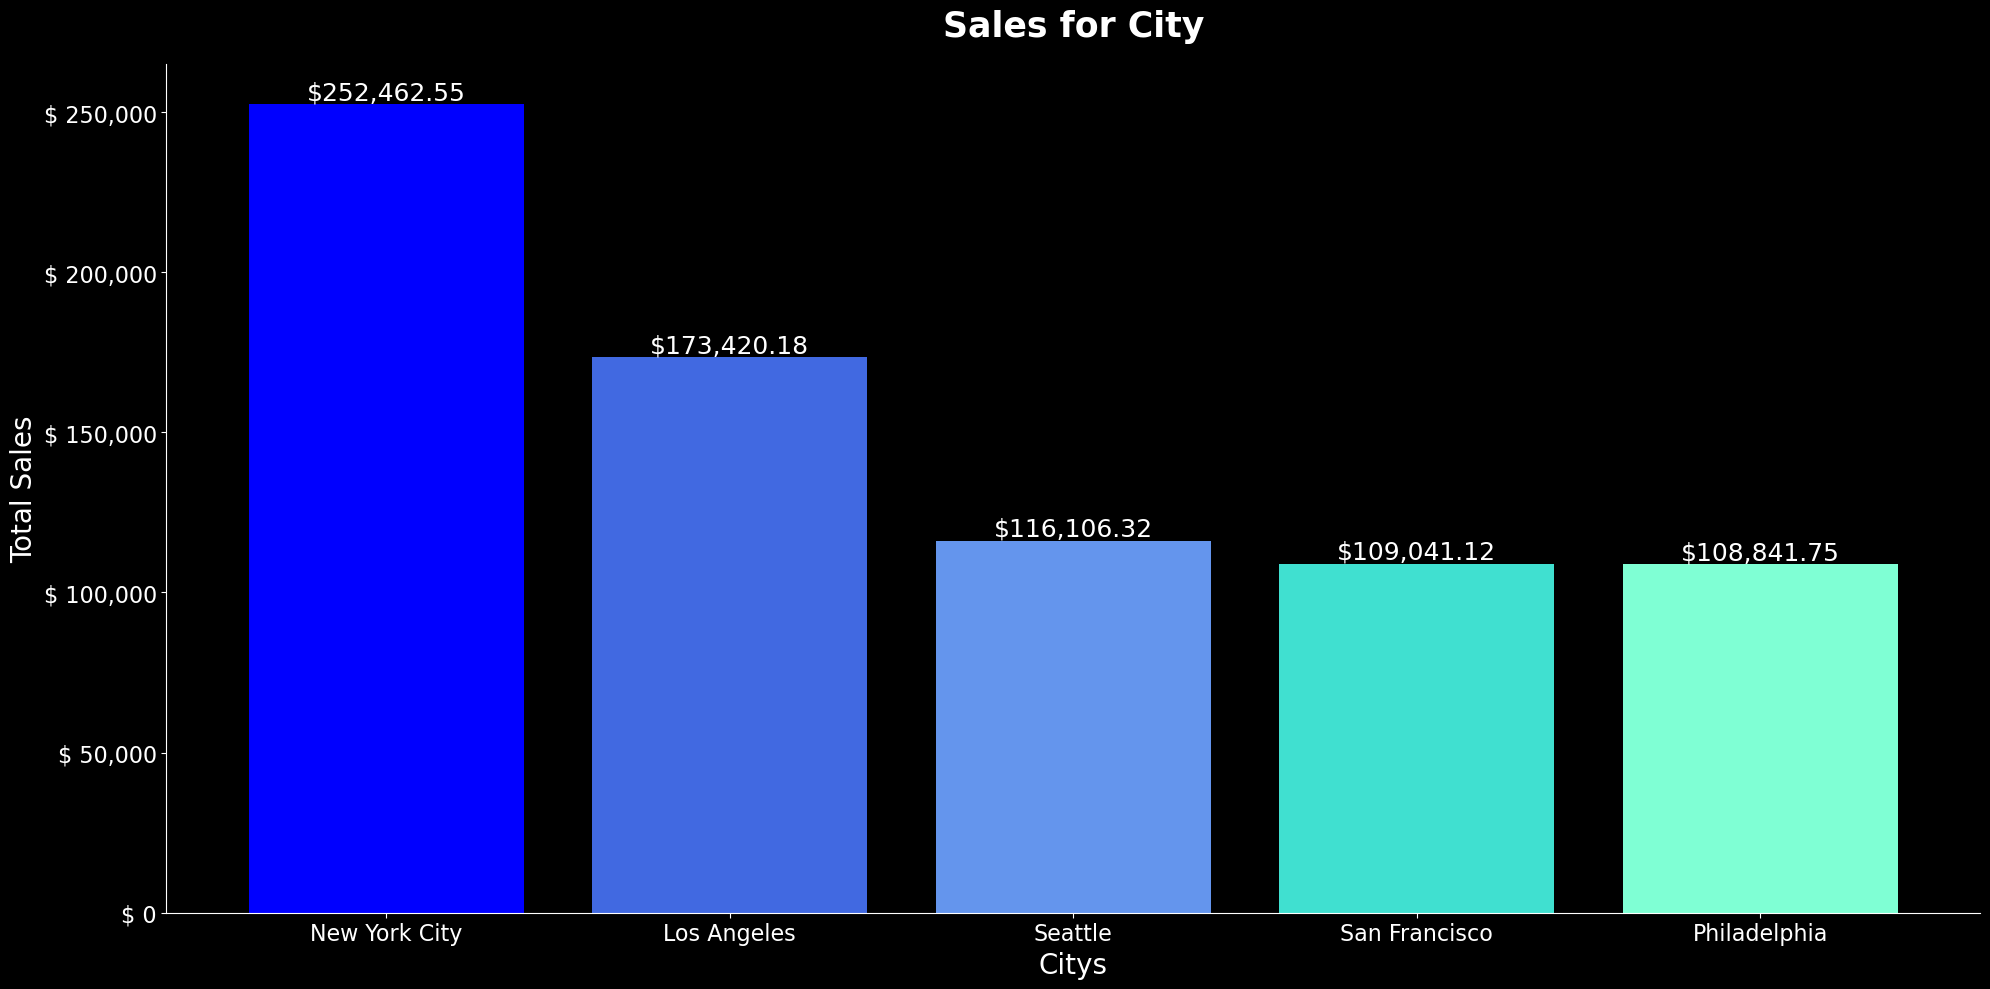

In [30]:
cidade_mais_vendeu = dados_limpos.groupby('City')['Sales'].sum()

df_cidades = pd.DataFrame({
    'Citys': cidade_mais_vendeu.index,
    'Sales': cidade_mais_vendeu.values
})

df_cidades_mais_vendas = df_cidades.sort_values('Sales',ascending=False).head()

display(df_cidades_mais_vendas)

plt.figure(figsize=[20,10])
bars = plt.bar(df_cidades_mais_vendas['Citys'],df_cidades_mais_vendas['Sales'], color=['blue','royalblue','cornflowerblue','turquoise','aquamarine'])

for bar in bars:
    altura = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.,altura,
             f'${altura:,.2f}',
             ha='center', va='bottom',fontsize = 18)
    
plt.title('Sales for City', fontsize=25, fontweight='bold', pad=20)
plt.xlabel('Citys', fontsize=20)
plt.ylabel('Total Sales', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Removendo a borda direita e superior
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# Formatando eixo Y para mostrar valores monetários
plt.gca().yaxis.set_major_formatter('$ {x:,.0f}')

plt.tight_layout()  
plt.show()



Modo de entrega mais utilizado

,Shipe Mode,Count
0,Standard Class,5859
1,Second Class,1902
2,First Class,1501
3,Same Day,538


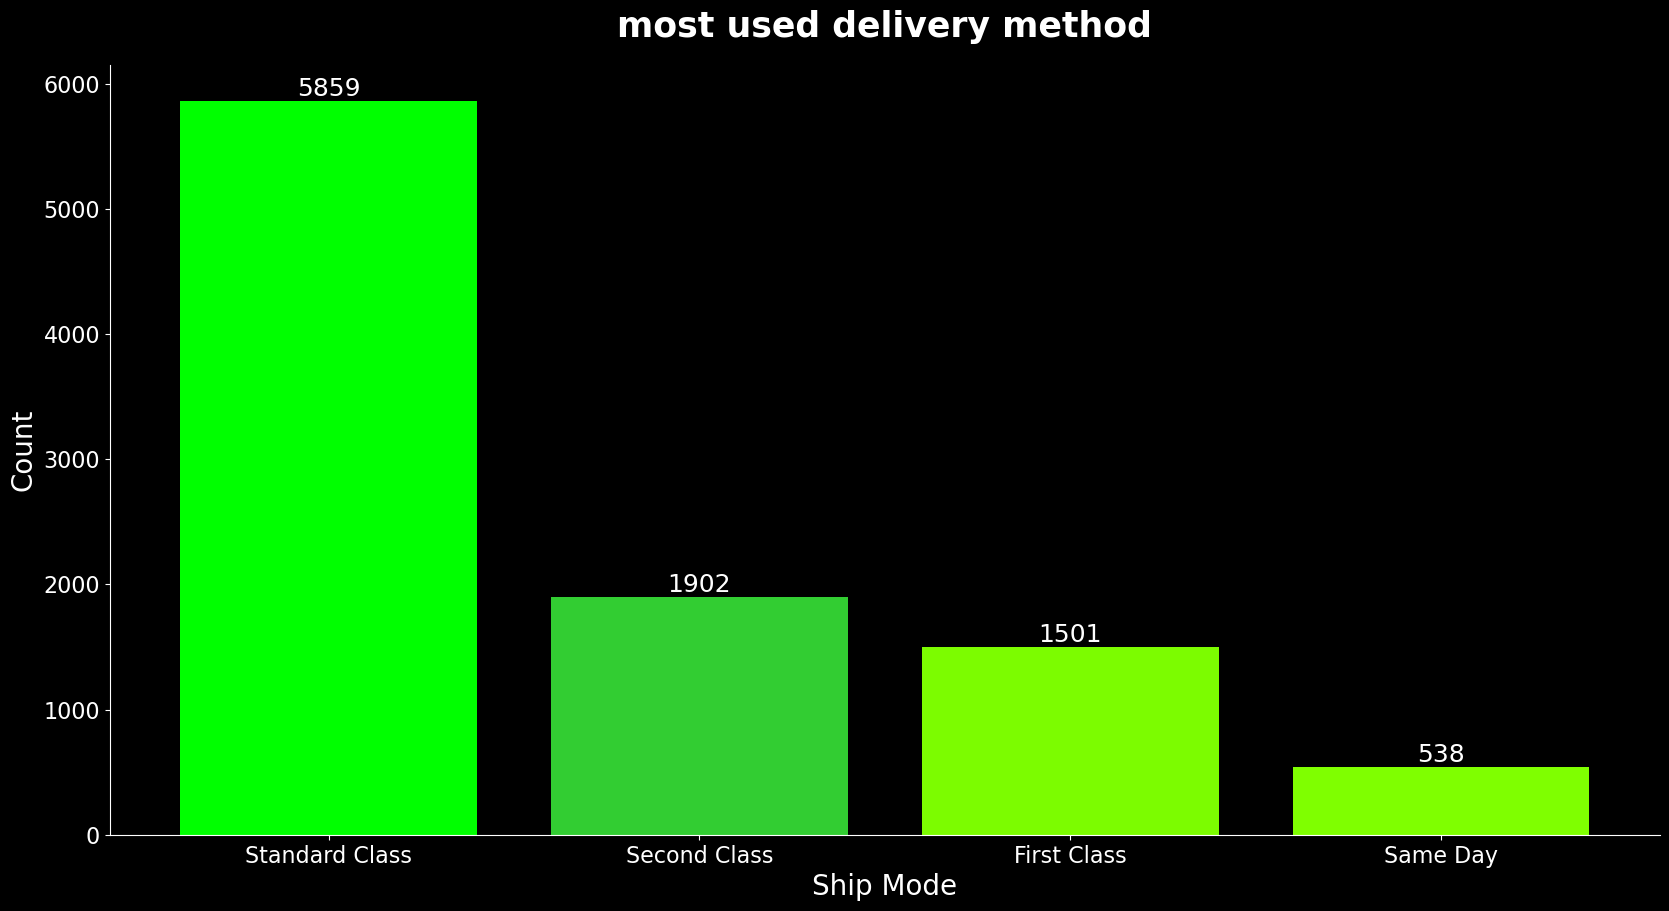

In [54]:
modos_entrega = dados_limpos['Ship Mode'].value_counts()

df_entrega = pd.DataFrame({'Shipe Mode':modos_entrega.index,
                           'Count': modos_entrega.values}
                           )

display(df_entrega)

plt.figure(figsize=[20,10])

bars = plt.bar(df_entrega['Shipe Mode'],df_entrega['Count'], color=['lime','limegreen','lawngreen','chartreuse','greenyellow'])


for bar in bars:
    altura = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.,altura,
             f'{altura}',
             ha='center', va='bottom',fontsize = 18)
    
plt.title('most used delivery method', fontsize=25, fontweight='bold', pad=20)
plt.xlabel('Ship Mode', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.show()



Product more sales

,Product Name,Sales
404,Canon imageCLASS 2200 Advanced Copier,61599.824
649,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384
444,Cisco TelePresence System EX90 Videoconferenci...,22638.480
785,HON 5400 Series Task Chairs for Big and Tall,21870.576
685,GBC DocuBind TL300 Electric Binding System,19823.479
...,...,...
97,Acme Serrated Blade Letter Opener,7.632
783,Grip Seal Envelopes,7.072
1792,Xerox 20,6.480
208,Avery 5,5.760


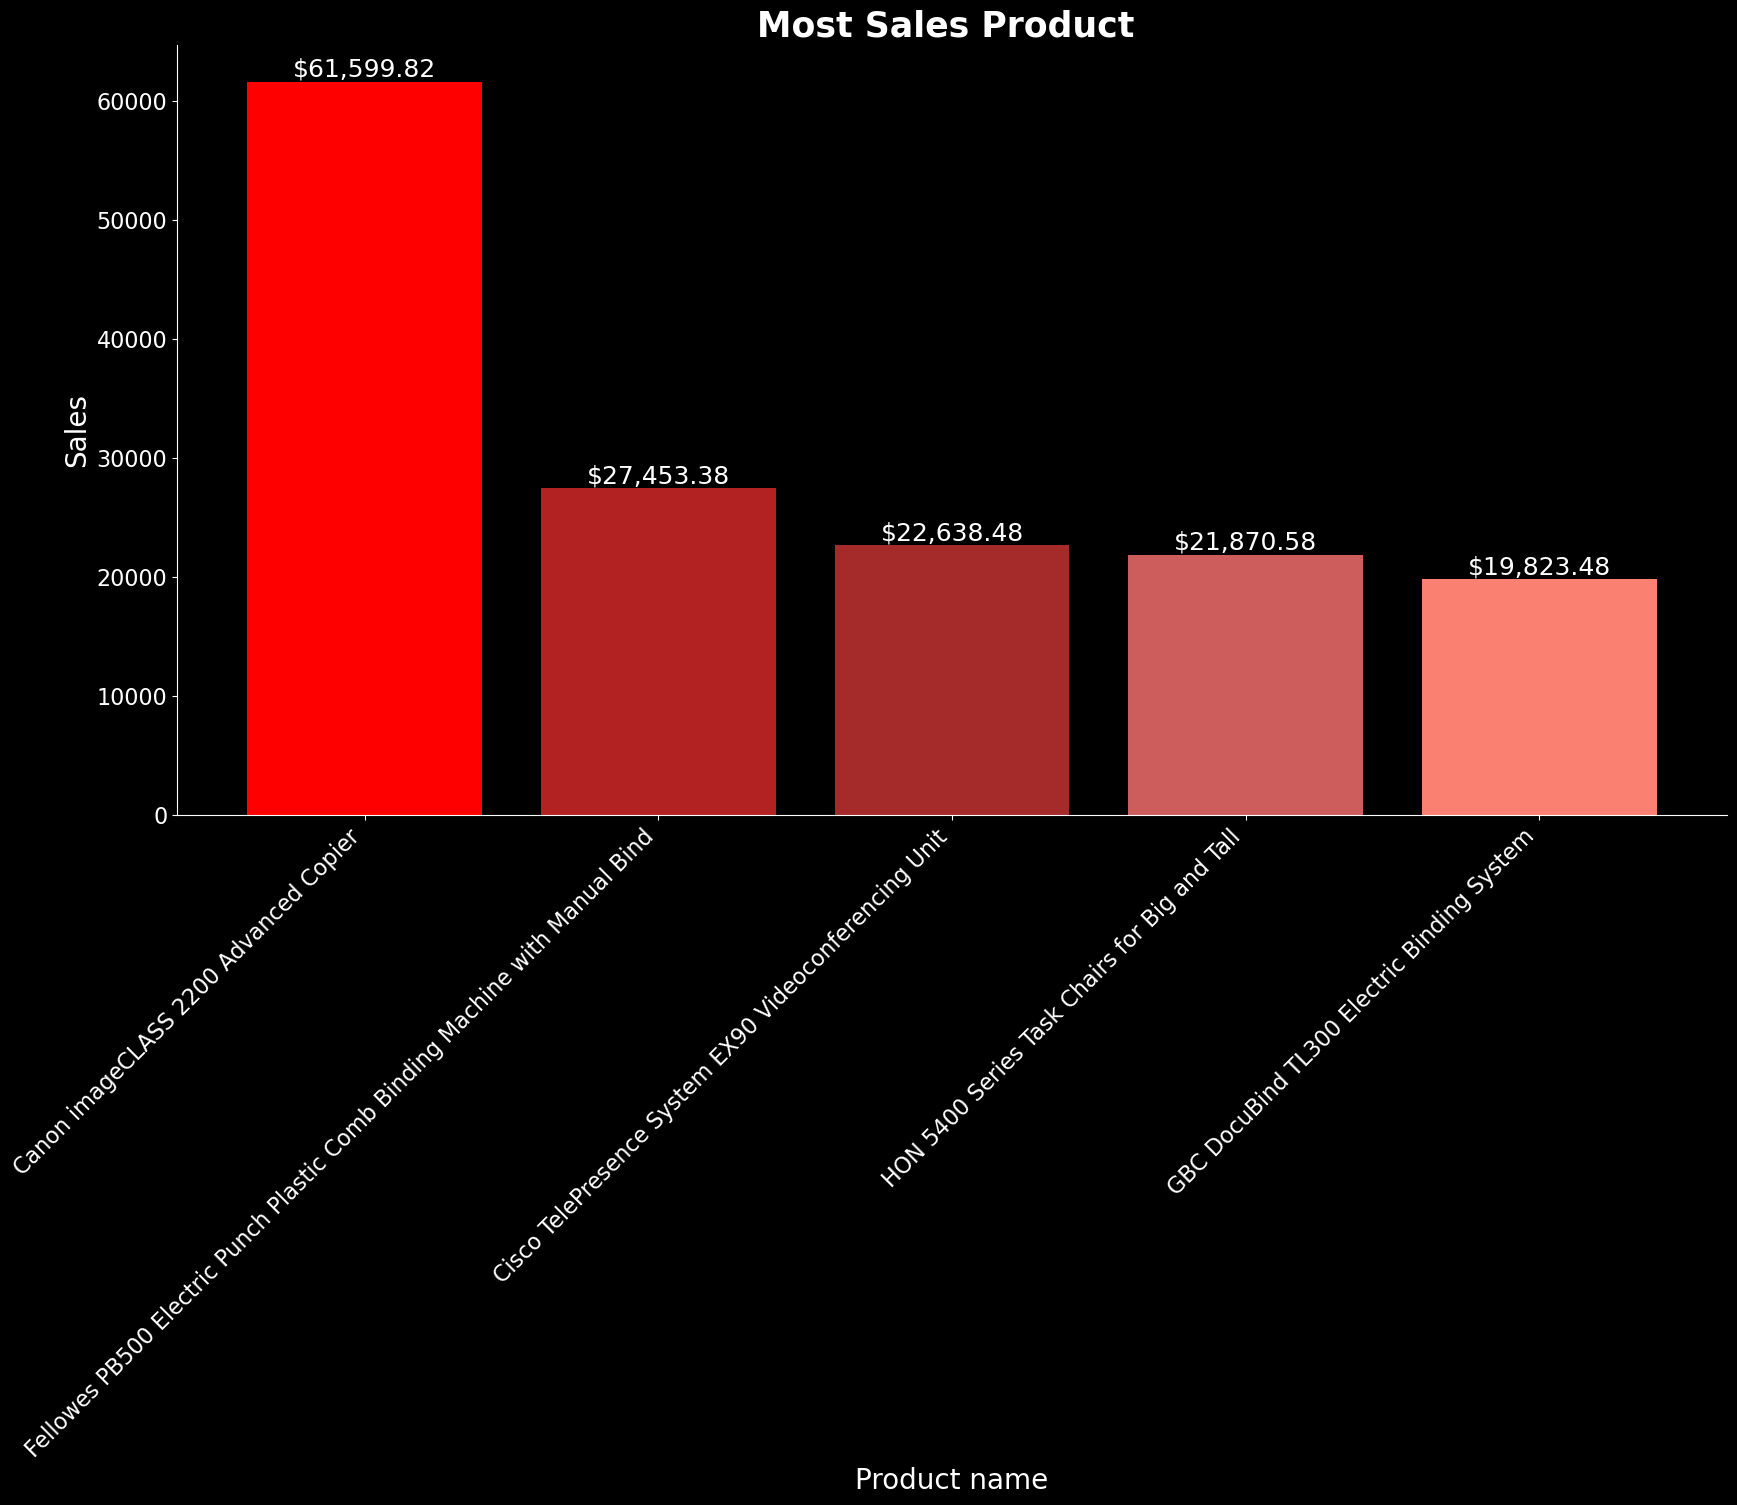

In [67]:
produtos_mais_vendidos = dados_limpos.groupby('Product Name')['Sales'].sum()

df_produtos = pd.DataFrame({
    "Product Name": produtos_mais_vendidos.index,
    "Sales": produtos_mais_vendidos.values
})

display(df_produtos.sort_values(by='Sales',ascending=False))

df_produtos = df_produtos.sort_values(by='Sales',ascending=False).head()

plt.figure(figsize=[20,10])
bars = plt.bar(df_produtos['Product Name'],df_produtos['Sales'],color = ['red','firebrick','brown','indianred','salmon'])

for bar in bars:
    altura = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.,altura,
             f'${altura:,.2F}',
             ha='center', va='bottom',fontsize = 18)

plt.title('Most Sales Product ', fontsize=25, fontweight='bold')
plt.xlabel('Product name', fontsize=20)
plt.ylabel('Sales', fontsize=20)
plt.xticks(rotation=45,fontsize=16, ha ='right')
plt.yticks(fontsize=16)

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.show()